# Lab 1 Analysis Example using Thicket

In [2]:
!pip install llnl-thicket

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.5 MB/s eta 0:00:00


In [3]:
import sys
# sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
# sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

<IPython.core.display.Javascript object>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

## modify this to whatever directory you saved this file and the data in
%cd /content/drive/My Drive/thicket-practice/

Mounted at /content/drive
/content/drive/My Drive/thicket-practice


Read in all the files

In [7]:
# tk = th.Thicket.from_caliperreader(glob("cali_files/sort0/*.cali"))
tk = th.Thicket.from_caliperreader(glob("merge_mpi_cali/*.cali"))
tk.dataframe = tk.dataframe.drop(["nid", "spot.channel", "Total time"], axis=1)
#tk.dataframe = tk.dataframe.drop(["spot.channel", "Total time"], axis=1)

In [8]:
# Performance data
tk.dataframe

Min time/rank  \
node                                              profile                     
{'name': 'main', 'type': 'function'}              6222213         16.583746   
                                                  8654018          5.934962   
                                                  65364533         0.788291   
                                                  83147926        13.077885   
                                                  108340675        6.927706   
                                                  113649686       19.089650   
                                                  124517305        0.771172   
                                                  142231215        0.508345   
                                                  147753700        0.548983   
                                                  150738664        0.532398   
                                                  156047618        8.357334   
                                                  195167352        0.573237   
                                                  223604819        0.886345   
                                                  250811712        0.404289   
                                                  256601229        9.248942   
                                                  280790330       27.601063   
                                                  323337785       25.932993   
                                                  327768957       26.306306   
                                                  343605715        1.107286   
                                                  356130471        1.794932   
                                                  376878331        3.408614   
                                                  391560635        1.471097   
                                                  402246789       14.125322   
                                                  429575901        3.190064   
                                                  440311480        0.990349   
                                                  442415665        1.494236   
                                                  442775966        0.755487   
                                                  446891881        0.814511   
                                                  466359386        8.035825   
                                                  483442337        8.651232   
                                                  492146754        4.509099   
                                                  497271456        9.755237   
                                                  497651054       28.022578   
                                                  514764303       36.090118   
                                                  585839645       26.324211   
                                                  606493607        2.503674   
                                                  640602562        1.798493   
                                                  668803083        9.698750   
                                                  671331609        1.406953   
                                                  672587892       25.968184   
                                                  678281950        3.345770   
                                                  679404600        2.495097   
                                                  683898562        0.598936   
                                                  687300418        3.474556   
                                                  693048497        0.526261   
                                                  706685210        0.394045   
                                                  717770186        2.409186   
                                                  745352312       26.123176   
                                                  746663286       27.599465   
                                 

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [9]:
tk.statsframe.dataframe["time"]= 1
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.1

1.000 main
├─ 1.000 comm
│  └─ 1.000 comm_large
│     ├─ 1.000 MPI_Recv
│     ├─ 1.000 MPI_Scatter
│     └─ 1.000 MPI_Send
├─ 1.000 comp
│  └─ 1.000 comp_large
├─ 1.000 correctness_check
└─ 1.000 data_init



In [10]:
tk.metadata

cali.caliper.version  mpi.world.size  \
profile                                           
6222213              2.11.0-dev               4   
8654018              2.11.0-dev              64   
65364533             2.11.0-dev              16   
83147926             2.11.0-dev             128   
108340675            2.11.0-dev               2   
113649686            2.11.0-dev             512   
124517305            2.11.0-dev              16   
142231215            2.11.0-dev               2   
147753700            2.11.0-dev               4   
150738664            2.11.0-dev               8   
156047618            2.11.0-dev             128   
195167352            2.11.0-dev               8   
223604819            2.11.0-dev               8   
250811712            2.11.0-dev               4   
256601229            2.11.0-dev             512   
280790330            2.11.0-dev               2   
323337785            2.11.0-dev            1024   
327768957            2.11.0-dev            1024   
343605715            2.11.0-dev               4   
356130471            2.11.0-dev               4   
376878331            2.11.0-dev             256   
391560635            2.11.0-dev              32   
402246789            2.11.0-dev               4   
429575901            2.11.0-dev             256   
440311480            2.11.0-dev              16   
442415665            2.11.0-dev               4   
442775966            2.11.0-dev              16   
446891881            2.11.0-dev              16   
466359386            2.11.0-dev             512   
483442337            2.11.0-dev             512   
492146754            2.11.0-dev               8   
497271456            2.11.0-dev             512   
497651054            2.11.0-dev            1024   
514764303            2.11.0-dev            1024   
585839645            2.11.0-dev               4   
606493607            2.11.0-dev              64   
640602562            2.11.0-dev              16   
668803083            2.11.0-dev             512   
671331609            2.11.0-dev              32   
672587892            2.11.0-dev            1024   
678281950            2.11.0-dev             256   
679404600            2.11.0-dev             128   
683898562            2.11.0-dev               2   
687300418            2.11.0-dev             256   
693048497            2.11.0-dev               8   
706685210            2.11.0-dev               4   
717770186            2.11.0-dev               8   
745352312            2.11.0-dev            1024   
746663286            2.11.0-dev               2   
752637709            2.11.0-dev              64   
775259206            2.11.0-dev               4   
787759768            2.11.0-dev            1024   
792957775            2.11.0-dev               2   
798833536            2.11.0-dev             256   
847023067            2.11.0-dev             128   
873438930            2.11.0-dev             128   
904480258            2.11.0-dev              16   
919199520            2.11.0-dev             256   
922653823            2.11.0-dev            1024   
928804105            2.11.0-dev              64   
938271588            2.11.0-dev              64   
982372139            2.11.0-dev               2   
985392218            2.11.0-dev              16   
1008440072           2.11.0-dev              32   
1009408275           2.11.0-dev               4   
1009855248           2.11.0-dev              64   
1071160307           2.11.0-dev               2   
1109267855           2.11.0-dev              32   
1117446283           2.11.0-dev              32   
1155265737           2.11.0-dev               4   
1166755277           2.11.0-dev               8   
1177683944           2.11.0-dev              64   
1208412274           2.11.0-dev             512   
1221688842           2.11.0-dev               2   
1242476576           2.11.0-dev               2   
1248883357           2.11.0-dev             256   
1281378027           2.11.0-dev  

In [11]:
gb = tk.groupby("num_procs")
# gb = tk.groupby("num_threads")
print(gb.keys())
allthickets = list(gb.values())
# input2 = gb[2].groupby("Algorithm")
# input4 = gb[4].groupby("Algorithm")
# input8 = gb[8].groupby("Algorithm")
# input16 = gb[16].groupby("Algorithm")
# input32 = gb[32].groupby("Algorithm")
# input64 = gb[64].groupby("Algorithm")
# input128 = gb[128].groupby("Algorithm")
# input256 = gb[256].groupby("Algorithm")
# input512 = gb[512].groupby("Algorithm")
# input1024 = gb[1024].groupby("Algorithm")


input2 = gb[2].groupby("InputType")
input4 = gb[4].groupby("InputType")
input8 = gb[8].groupby("InputType")
input16 = gb[16].groupby("InputType")
input32 = gb[32].groupby("InputType")
input64 = gb[64].groupby("InputType")
input128 = gb[128].groupby("InputType")
input256 = gb[256].groupby("InputType")
input512 = gb[512].groupby("InputType")
input1024 = gb[1024].groupby("InputType")

10  thickets created...
{2: <thicket.thicket.Thicket object at 0x7b0b3baf18a0>, 4: <thicket.thicket.Thicket object at 0x7b0b3bad12a0>, 8: <thicket.thicket.Thicket object at 0x7b0b3bba68c0>, 16: <thicket.thicket.Thicket object at 0x7b0b3be4a1d0>, 32: <thicket.thicket.Thicket object at 0x7b0b3b845ae0>, 64: <thicket.thicket.Thicket object at 0x7b0b3b8462f0>, 128: <thicket.thicket.Thicket object at 0x7b0b3b844220>, 256: <thicket.thicket.Thicket object at 0x7b0b3b801570>, 512: <thicket.thicket.Thicket object at 0x7b0b3b803fa0>, 1024: <thicket.thicket.Thicket object at 0x7b0b3bfa7ee0>}
dict_keys([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])
4  thickets created...
{'1%perturbed': <thicket.thicket.Thicket object at 0x7b0b3b912ef0>, 'Random': <thicket.thicket.Thicket object at 0x7b0b3bc82800>, 'ReverseSorted': <thicket.thicket.Thicket object at 0x7b0b3bc64880>, 'Sorted': <thicket.thicket.Thicket object at 0x7b0b3bc80eb0>}
4  thickets created...
{'1%perturbed': <thicket.thicket.Thicket object at 0

Compose these 3 groups column-wise to get a holistic view of the data

In [13]:
ctk2 = th.Thicket.concat_thickets(
    thickets=list(input2.values()),
    headers=list(input2.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk4 = th.Thicket.concat_thickets(
    thickets=list(input4.values()),
    headers=list(input4.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk8 = th.Thicket.concat_thickets(
    thickets=list(input8.values()),
    headers=list(input8.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk16 = th.Thicket.concat_thickets(
    thickets=list(input16.values()),
    headers=list(input16.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk32 = th.Thicket.concat_thickets(
    thickets=list(input32.values()),
    headers=list(input32.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk64 = th.Thicket.concat_thickets(
    thickets=list(input64.values()),
    headers=list(input64.keys()),
    axis="columns",
    metadata_key="InputSize"
)
ctk128 = th.Thicket.concat_thickets(
    thickets=list(input128.values()),
    headers=list(input128.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk256 = th.Thicket.concat_thickets(
    thickets=list(input256.values()),
    headers=list(input256.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk512 = th.Thicket.concat_thickets(
    thickets=list(input512.values()),
    headers=list(input512.keys()),
    axis="columns",
    metadata_key="InputSize"
)

ctk1024 = th.Thicket.concat_thickets(
    thickets=list(input1024.values()),
    headers=list(input1024.keys()),
    axis="columns",
    metadata_key="InputSize"
)



allctk = []
allctk.append(ctk2)
allctk.append(ctk4)
allctk.append(ctk8)
allctk.append(ctk16)
allctk.append(ctk32)
allctk.append(ctk64)
allctk.append(ctk128)
allctk.append(ctk256)
allctk.append(ctk512)
allctk.append(ctk1024)

In [14]:
for ctk in allctk:
    display(ctk.dataframe)

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.583758   
                                                  262144         0.515708   
                                                  1048576        0.598936   
                                                  4194304        0.697112   
                                                  16777216       2.297981   
                                                  67108864       8.114555   
                                                  268435456     32.832862   
{'name': 'comm', 'type': 'function'}              65536          0.000274   
                                                  262144         0.000781   
                                                  1048576        0.002770   
                                                  4194304        0.008942   
                                                  16777216       0.029912   
                                                  67108864       0.138661   
                                                  268435456      0.530080   
{'name': 'comm_large', 'type': 'function'}        65536          0.000233   
                                                  262144         0.000748   
                                                  1048576        0.002738   
                                                  4194304        0.008907   
                                                  16777216       0.029865   
                                                  67108864       0.138624   
                                                  268435456      0.530018   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000366   
                                                  262144         0.000322   
                                                  1048576        0.001142   
                                                  4194304        0.002433   
                                                  16777216       0.014544   
                                                  67108864       0.061654   
                                                  268435456      0.236120   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000168   
                                                  262144         0.000550   
                                                  1048576        0.002146   
                                                  4194304        0.006428   
                                                  16777216       0.020688   
                                                  67108864       0.080671   
                                                  268435456      0.298968   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000033   
                                                  262144         0.000103   
                                                  1048576        0.000350   
                                                  4194304        0.002916   
                                                  16777216       0.005246   
                                                  67108864       0.038621   
                                                  268435456      0.143486   
{'name': 'comp', 'type': 'function'}              65536          0.004512   
                                                  262144         0.018718   
                                                  1048576        0.081800   
                                                  4194304        0.356991   
                                                  16777216       1.536963   
                                                  67108864       6.607843   
                                                  268435456     28.246025   
{'name': 'comp_large', 'type': 'function'}        65536   

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.363035   
                                                  262144         0.368705   
                                                  1048576        0.404289   
                                                  4194304        0.599575   
                                                  16777216       1.494236   
                                                  67108864       4.209053   
                                                  268435456     16.583746   
{'name': 'comm', 'type': 'function'}              65536          0.000186   
                                                  262144         0.000491   
                                                  1048576        0.002063   
                                                  4194304        0.005752   
                                                  16777216       0.020894   
                                                  67108864       0.082254   
                                                  268435456      0.286790   
{'name': 'comm_large', 'type': 'function'}        65536          0.000155   
                                                  262144         0.000458   
                                                  1048576        0.002034   
                                                  4194304        0.005716   
                                                  16777216       0.020858   
                                                  67108864       0.082219   
                                                  268435456      0.286745   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000066   
                                                  262144         0.000636   
                                                  1048576        0.000897   
                                                  4194304        0.003404   
                                                  16777216       0.009907   
                                                  67108864       0.036573   
                                                  268435456      0.143383   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000093   
                                                  262144         0.000306   
                                                  1048576        0.001391   
                                                  4194304        0.004831   
                                                  16777216       0.015012   
                                                  67108864       0.056691   
                                                  268435456      0.199593   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000027   
                                                  262144         0.000050   
                                                  1048576        0.000383   
                                                  4194304        0.000838   
                                                  16777216       0.003642   
                                                  67108864       0.024983   
                                                  268435456      0.087099   
{'name': 'comp', 'type': 'function'}              65536          0.002005   
                                                  262144         0.009496   
                                                  1048576        0.039057   
                                                  4194304        0.170240   
                                                  16777216       0.737840   
                                                  67108864       3.186147   
                                                  268435456     13.642442   
{'name': 'comp_large', 'type': 'function'}        65536   

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.506614   
                                                  262144         0.493514   
                                                  1048576        0.532398   
                                                  4194304        0.596257   
                                                  16777216       1.260271   
                                                  67108864       2.409186   
                                                  268435456      8.750022   
{'name': 'comm', 'type': 'function'}              65536          0.000144   
                                                  262144         0.000299   
                                                  1048576        0.000703   
                                                  4194304        0.003350   
                                                  16777216       0.011614   
                                                  67108864       0.039137   
                                                  268435456      0.181407   
{'name': 'comm_large', 'type': 'function'}        65536          0.000111   
                                                  262144         0.000263   
                                                  1048576        0.000672   
                                                  4194304        0.003320   
                                                  16777216       0.011569   
                                                  67108864       0.039092   
                                                  268435456      0.181354   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000046   
                                                  262144         0.000127   
                                                  1048576        0.000421   
                                                  4194304        0.001863   
                                                  16777216       0.005469   
                                                  67108864       0.020676   
                                                  268435456      0.079857   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000061   
                                                  262144         0.000199   
                                                  1048576        0.000594   
                                                  4194304        0.002983   
                                                  16777216       0.009040   
                                                  67108864       0.026423   
                                                  268435456      0.112267   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000023   
                                                  262144         0.000034   
                                                  1048576        0.000056   
                                                  4194304        0.000311   
                                                  16777216       0.001666   
                                                  67108864       0.007185   
                                                  268435456      0.036904   
{'name': 'comp', 'type': 'function'}              65536          0.000932   
                                                  262144         0.004157   
                                                  1048576        0.018465   
                                                  4194304        0.081181   
                                                  16777216       0.353291   
                                                  67108864       1.528606   
                                                  268435456      6.576643   
{'name': 'comp_large', 'type': 'function'}        65536   

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          0.775232   
                                                  262144         0.774179   
                                                  1048576        0.789934   
                                                  4194304        0.808226   
                                                  16777216       1.026017   
                                                  67108864       1.798493   
                                                  268435456      5.159625   
{'name': 'comm', 'type': 'function'}              65536          0.000125   
                                                  262144         0.000193   
                                                  1048576        0.000491   
                                                  4194304        0.001568   
                                                  16777216       0.005663   
                                                  67108864       0.018085   
                                                  268435456      0.081279   
{'name': 'comm_large', 'type': 'function'}        65536          0.000092   
                                                  262144         0.000157   
                                                  1048576        0.000456   
                                                  4194304        0.001535   
                                                  16777216       0.005623   
                                                  67108864       0.018048   
                                                  268435456      0.081223   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000030   
                                                  262144         0.000072   
                                                  1048576        0.000221   
                                                  4194304        0.000922   
                                                  16777216       0.003114   
                                                  67108864       0.010883   
                                                  268435456      0.032097   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000040   
                                                  262144         0.000106   
                                                  1048576        0.000382   
                                                  4194304        0.001333   
                                                  16777216       0.004741   
                                                  67108864       0.014147   
                                                  268435456      0.053247   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000022   
                                                  262144         0.000026   
                                                  1048576        0.000050   
                                                  4194304        0.000168   
                                                  16777216       0.000750   
                                                  67108864       0.002997   
                                                  268435456      0.018472   
{'name': 'comp', 'type': 'function'}              65536          0.000444   
                                                  262144         0.001940   
                                                  1048576        0.009059   
                                                  4194304        0.038825   
                                                  16777216       0.168899   
                                                  67108864       0.733365   
                                                  268435456      3.161260   
{'name': 'comp_large', 'type': 'function'}        65536   

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          1.479618   
                                                  262144         1.416167   
                                                  1048576        1.371590   
                                                  4194304        1.389417   
                                                  16777216       1.506357   
                                                  67108864       1.933861   
                                                  268435456      3.879478   
{'name': 'comm', 'type': 'function'}              65536          0.000124   
                                                  262144         0.000184   
                                                  1048576        0.000391   
                                                  4194304        0.001115   
                                                  16777216       0.003505   
                                                  67108864       0.009658   
                                                  268435456      0.042843   
{'name': 'comm_large', 'type': 'function'}        65536          0.000084   
                                                  262144         0.000142   
                                                  1048576        0.000348   
                                                  4194304        0.001073   
                                                  16777216       0.003461   
                                                  67108864       0.009616   
                                                  268435456      0.042803   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000019   
                                                  262144         0.000051   
                                                  1048576        0.000126   
                                                  4194304        0.000441   
                                                  16777216       0.000863   
                                                  67108864       0.005694   
                                                  268435456      0.017710   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000028   
                                                  262144         0.000087   
                                                  1048576        0.000275   
                                                  4194304        0.000906   
                                                  16777216       0.003033   
                                                  67108864       0.007791   
                                                  268435456      0.026293   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000019   
                                                  262144         0.000026   
                                                  1048576        0.000036   
                                                  4194304        0.000096   
                                                  16777216       0.000371   
                                                  67108864       0.001514   
                                                  268435456      0.007164   
{'name': 'comp', 'type': 'function'}              65536          0.000219   
                                                  262144         0.000944   
                                                  1048576        0.004034   
                                                  4194304        0.018215   
                                                  16777216       0.080435   
                                                  67108864       0.350605   
                                                  268435456      1.520287   
{'name': 'comp_large', 'type': 'function'}        65536   

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          1.368707   
                                                  262144         1.357459   
                                                  1048576        5.934962   
                                                  4194304        1.427527   
                                                  16777216       1.449630   
                                                  67108864       1.711480   
                                                  268435456      2.735725   
{'name': 'comm', 'type': 'function'}              65536          0.000881   
                                                  262144         0.000317   
                                                  1048576        0.002023   
                                                  4194304        0.000499   
                                                  16777216       0.001869   
                                                  67108864       0.005225   
                                                  268435456      0.022345   
{'name': 'comm_large', 'type': 'function'}        65536          0.000859   
                                                  262144         0.000293   
                                                  1048576        0.001987   
                                                  4194304        0.000475   
                                                  16777216       0.001831   
                                                  67108864       0.005192   
                                                  268435456      0.022308   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000014   
                                                  262144         0.000028   
                                                  1048576        0.000073   
                                                  4194304        0.000236   
                                                  16777216       0.000833   
                                                  67108864       0.002713   
                                                  268435456      0.009576   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000817   
                                                  262144         0.000245   
                                                  1048576        0.000810   
                                                  4194304        0.000399   
                                                  16777216       0.001483   
                                                  67108864       0.004293   
                                                  268435456      0.014006   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000015   
                                                  262144         0.000019   
                                                  1048576        0.000059   
                                                  4194304        0.000046   
                                                  16777216       0.000183   
                                                  67108864       0.000778   
                                                  268435456      0.003126   
{'name': 'comp', 'type': 'function'}              65536          0.000112   
                                                  262144         0.000450   
                                                  1048576        0.001919   
                                                  4194304        0.008715   
                                                  16777216       0.038212   
                                                  67108864       0.167049   
                                                  268435456      0.725295   
{'name': 'comp_large', 'type': 'function'}        65536   

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          1.538885   
                                                  262144         2.902251   
                                                  1048576        1.478526   
                                                  4194304        1.437552   
                                                  16777216       1.492629   
                                                  67108864       8.357334   
                                                  268435456      2.239162   
{'name': 'comm', 'type': 'function'}              65536          0.000841   
                                                  262144         0.003393   
                                                  1048576        0.000338   
                                                  4194304        0.000452   
                                                  16777216       0.001035   
                                                  67108864       0.003931   
                                                  268435456      0.009983   
{'name': 'comm_large', 'type': 'function'}        65536          0.000816   
                                                  262144         0.003370   
                                                  1048576        0.000316   
                                                  4194304        0.000425   
                                                  16777216       0.001007   
                                                  67108864       0.003875   
                                                  268435456      0.009946   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000015   
                                                  262144         0.000021   
                                                  1048576        0.000046   
                                                  4194304        0.000124   
                                                  16777216       0.000446   
                                                  67108864       0.001815   
                                                  268435456      0.004825   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000768   
                                                  262144         0.003326   
                                                  1048576        0.000271   
                                                  4194304        0.000366   
                                                  16777216       0.000886   
                                                  67108864       0.003443   
                                                  268435456      0.007736   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000015   
                                                  262144         0.000018   
                                                  1048576        0.000021   
                                                  4194304        0.000033   
                                                  16777216       0.000056   
                                                  67108864       0.000371   
                                                  268435456      0.001574   
{'name': 'comp', 'type': 'function'}              65536          0.000061   
                                                  262144         0.000219   
                                                  1048576        0.000929   
                                                  4194304        0.004047   
                                                  16777216       0.018162   
                                                  67108864       0.079114   
                                                  268435456      0.345328   
{'name': 'comp_large', 'type': 'function'}        65536   

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          3.179447   
                                                  262144         3.223460   
                                                  1048576        3.345770   
                                                  4194304        3.274704   
                                                  16777216       3.409016   
                                                  67108864       4.279012   
                                                  268435456      4.405725   
{'name': 'comm', 'type': 'function'}              65536          0.000214   
                                                  262144         0.000316   
                                                  1048576        0.000445   
                                                  4194304        0.000168   
                                                  16777216       0.000507   
                                                  67108864       0.001648   
                                                  268435456      0.012243   
{'name': 'comm_large', 'type': 'function'}        65536          0.000177   
                                                  262144         0.000277   
                                                  1048576        0.000418   
                                                  4194304        0.000129   
                                                  16777216       0.000467   
                                                  67108864       0.001605   
                                                  268435456      0.012180   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000014   
                                                  262144         0.000015   
                                                  1048576        0.000021   
                                                  4194304        0.000066   
                                                  16777216       0.000226   
                                                  67108864       0.000782   
                                                  268435456      0.002710   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000138   
                                                  262144         0.000238   
                                                  1048576        0.000365   
                                                  4194304        0.000080   
                                                  16777216       0.000254   
                                                  67108864       0.001368   
                                                  268435456      0.007439   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000015   
                                                  262144         0.000015   
                                                  1048576        0.000017   
                                                  4194304        0.000026   
                                                  16777216       0.000058   
                                                  67108864       0.000197   
                                                  268435456      0.000802   
{'name': 'comp', 'type': 'function'}              65536          0.000036   
                                                  262144         0.000110   
                                                  1048576        0.000443   
                                                  4194304        0.001967   
                                                  16777216       0.008635   
                                                  67108864       0.057848   
                                                  268435456      0.325190   
{'name': 'comp_large', 'type': 'function'}        65536   

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536          7.944079   
                                                  262144         7.795304   
                                                  1048576        7.830880   
                                                  4194304        8.074438   
                                                  16777216       8.195324   
                                                  67108864       8.291473   
                                                  268435456      9.606032   
{'name': 'comm', 'type': 'function'}              65536          0.002058   
                                                  262144         0.001146   
                                                  1048576        0.002006   
                                                  4194304        0.000143   
                                                  16777216       0.000292   
                                                  67108864       0.000872   
                                                  268435456      0.008085   
{'name': 'comm_large', 'type': 'function'}        65536          0.002021   
                                                  262144         0.001118   
                                                  1048576        0.001968   
                                                  4194304        0.000105   
                                                  16777216       0.000259   
                                                  67108864       0.000833   
                                                  268435456      0.008044   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000015   
                                                  262144         0.000015   
                                                  1048576        0.000017   
                                                  4194304        0.000042   
                                                  16777216       0.000124   
                                                  67108864       0.000408   
                                                  268435456      0.001862   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000898   
                                                  262144         0.000758   
                                                  1048576        0.001919   
                                                  4194304        0.000061   
                                                  16777216       0.000142   
                                                  67108864       0.000459   
                                                  268435456      0.003079   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000015   
                                                  262144         0.000015   
                                                  1048576        0.000016   
                                                  4194304        0.000021   
                                                  16777216       0.000048   
                                                  67108864       0.000184   
                                                  268435456      0.000362   
{'name': 'comp', 'type': 'function'}              65536          0.000026   
                                                  262144         0.000060   
                                                  1048576        0.000220   
                                                  4194304        0.000942   
                                                  16777216       0.004075   
                                                  67108864       0.038771   
                                                  268435456      0.296919   
{'name': 'comp_large', 'type': 'function'}        65536   

1%perturbed  \
                                                            Min time/rank   
node                                              InputSize                 
{'name': 'main', 'type': 'function'}              65536         25.667209   
                                                  262144        26.510375   
                                                  1048576       27.115781   
                                                  4194304       25.985133   
                                                  16777216      26.306306   
                                                  67108864      26.933044   
                                                  268435456     27.685497   
{'name': 'comm', 'type': 'function'}              65536          0.000095   
                                                  262144         0.001542   
                                                  1048576        0.003851   
                                                  4194304        0.021167   
                                                  16777216       0.000181   
                                                  67108864       0.000608   
                                                  268435456      0.001728   
{'name': 'comm_large', 'type': 'function'}        65536          0.000059   
                                                  262144         0.001496   
                                                  1048576        0.003799   
                                                  4194304        0.021122   
                                                  16777216       0.000144   
                                                  67108864       0.000569   
                                                  268435456      0.001689   
{'name': 'MPI_Recv', 'type': 'function'}          65536          0.000015   
                                                  262144         0.000016   
                                                  1048576        0.000016   
                                                  4194304        0.000022   
                                                  16777216       0.000069   
                                                  67108864       0.000225   
                                                  268435456      0.000768   
{'name': 'MPI_Scatter', 'type': 'function'}       65536          0.000020   
                                                  262144         0.000471   
                                                  1048576        0.003103   
                                                  4194304        0.020969   
                                                  16777216       0.000088   
                                                  67108864       0.000258   
                                                  268435456      0.001437   
{'name': 'MPI_Send', 'type': 'function'}          65536          0.000015   
                                                  262144         0.000015   
                                                  1048576        0.000016   
                                                  4194304        0.000017   
                                                  16777216       0.000026   
                                                  67108864       0.000076   
                                                  268435456      0.000201   
{'name': 'comp', 'type': 'function'}              65536          0.000019   
                                                  262144         0.000039   
                                                  1048576        0.000113   
                                                  4194304        0.000447   
                                                  16777216       0.001942   
                                                  67108864       0.013850   
                                                  268435456      0.249590   
{'name': 'comp_large', 'type': 'function'}        65536   

Perform pandas operations to get the table in a desirable format for plotting

In [15]:
for ctk in allctk:
    # Drop unwanted columns
    columns_to_drop = [("node", ""), ("index", ""),]
    ctk.dataframe = ctk.dataframe.reset_index().drop(columns_to_drop, axis=1, errors='ignore')
    # Rename index to remove tuple
    ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

In [16]:
for ctk in allctk:
    display(ctk.dataframe)

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.583758      0.584530      0.584144   
                  262144         0.515708      0.518615      0.517161   
                  1048576        0.598936      0.609478      0.604207   
                  4194304        0.697112      0.738078      0.717595   
                  16777216       2.297981      2.460033      2.379007   
                  67108864       8.114555      8.741393      8.427974   
                  268435456     32.832862     35.269876     34.051369   
comm              65536          0.000274      0.000585      0.000429   
                  262144         0.000781      0.000926      0.000853   
                  1048576        0.002770      0.003345      0.003058   
                  4194304        0.008942      0.010539      0.009740   
                  16777216       0.029912      0.035315      0.032613   
                  67108864       0.138661      0.142430      0.140545   
                  268435456      0.530080      0.535190      0.532635   
comm_large        65536          0.000233      0.000557      0.000395   
                  262144         0.000748      0.000897      0.000823   
                  1048576        0.002738      0.003316      0.003027   
                  4194304        0.008907      0.010508      0.009707   
                  16777216       0.029865      0.035280      0.032572   
                  67108864       0.138624      0.142394      0.140509   
                  268435456      0.530018      0.535147      0.532583   
MPI_Recv          65536          0.000366      0.000366      0.000366   
                  262144         0.000322      0.000322      0.000322   
                  1048576        0.001142      0.001142      0.001142   
                  4194304        0.002433      0.002433      0.002433   
                  16777216       0.014544      0.014544      0.014544   
                  67108864       0.061654      0.061654      0.061654   
                  268435456      0.236120      0.236120      0.236120   
MPI_Scatter       65536          0.000168      0.000175      0.000172   
                  262144         0.000550      0.000622      0.000586   
                  1048576        0.002146      0.002362      0.002254   
                  4194304        0.006428      0.007556      0.006992   
                  16777216       0.020688      0.024577      0.022633   
                  67108864       0.080671      0.099949      0.090310   
                  268435456      0.298968      0.386478      0.342723   
MPI_Send          65536          0.000033      0.000033      0.000033   
                  262144         0.000103      0.000103      0.000103   
                  1048576        0.000350      0.000350      0.000350   
                  4194304        0.002916      0.002916      0.002916   
                  16777216       0.005246      0.005246      0.005246   
                  67108864       0.038621      0.038621      0.038621   
                  268435456      0.143486      0.143486      0.143486   
comp              65536          0.004512      0.004730      0.004621   
                  262144         0.018718      0.020680      0.019699   
                  1048576        0.081800      0.088595      0.085198   
                  4194304        0.356991      0.388182      0.372586   
                  16777216       1.536963      1.645520      1.591241   
                  67108864       6.607843      7.036078      6.821961   
                  268435456     28.246025     29.903725     29.074875   
comp_large        65536          0.004501      0.004712      0.004607   
                  262144         0.018705      0.020656      0.019681   
                  1048576        0.081786      0.088570      0.085178   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.363035      0.364715      0.363540   
                  262144         0.368705      0.373471      0.370343   
                  1048576        0.404289      0.419601      0.409547   
                  4194304        0.599575      0.653466      0.617712   
                  16777216       1.494236      1.705366      1.563176   
                  67108864       4.209053      5.047318      4.483041   
                  268435456     16.583746     19.924686     17.677541   
comm              65536          0.000186      0.000332      0.000257   
                  262144         0.000491      0.001590      0.000992   
                  1048576        0.002063      0.004659      0.003191   
                  4194304        0.005752      0.013704      0.010286   
                  16777216       0.020894      0.045788      0.034617   
                  67108864       0.082254      0.169320      0.132506   
                  268435456      0.286790      0.659234      0.499061   
comm_large        65536          0.000155      0.000291      0.000220   
                  262144         0.000458      0.001554      0.000957   
                  1048576        0.002034      0.004623      0.003154   
                  4194304        0.005716      0.013666      0.010248   
                  16777216       0.020858      0.045746      0.034577   
                  67108864       0.082219      0.169272      0.132465   
                  268435456      0.286745      0.659176      0.499013   
MPI_Recv          65536          0.000066      0.000165      0.000115   
                  262144         0.000636      0.001215      0.000926   
                  1048576        0.000897      0.002853      0.001875   
                  4194304        0.003404      0.007060      0.005232   
                  16777216       0.009907      0.023581      0.016744   
                  67108864       0.036573      0.087313      0.061943   
                  268435456      0.143383      0.340657      0.242020   
MPI_Scatter       65536          0.000093      0.000130      0.000110   
                  262144         0.000306      0.000479      0.000387   
                  1048576        0.001391      0.002276      0.001825   
                  4194304        0.004831      0.008311      0.006669   
                  16777216       0.015012      0.027587      0.021809   
                  67108864       0.056691      0.097407      0.079933   
                  268435456      0.199593      0.329649      0.292449   
MPI_Send          65536          0.000027      0.000049      0.000035   
                  262144         0.000050      0.000189      0.000104   
                  1048576        0.000383      0.000613      0.000475   
                  4194304        0.000838      0.002028      0.001240   
                  16777216       0.003642      0.007961      0.005805   
                  67108864       0.024983      0.035568      0.028680   
                  268435456      0.087099      0.149939      0.113990   
comp              65536          0.002005      0.003250      0.002383   
                  262144         0.009496      0.011712      0.010240   
                  1048576        0.039057      0.048716      0.042705   
                  4194304        0.170240      0.207724      0.183729   
                  16777216       0.737840      0.885399      0.790295   
                  67108864       3.186147      3.775144      3.393572   
                  268435456     13.642442     15.980743     14.477135   
comp_large        65536          0.001995      0.003219      0.002366   
                  262144         0.009484      0.011681      0.010221   
                  1048576        0.039033      0.048681      0.042681   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.506614      0.509257      0.507645   
                  262144         0.493514      0.501956      0.497084   
                  1048576        0.532398      0.550775      0.537455   
                  4194304        0.596257      0.658125      0.610587   
                  16777216       1.260271      1.509805      1.318859   
                  67108864       2.409186      3.374275      2.624895   
                  268435456      8.750022     12.552071      9.573385   
comm              65536          0.000144      0.000447      0.000245   
                  262144         0.000299      0.003293      0.001137   
                  1048576        0.000703      0.004635      0.002397   
                  4194304        0.003350      0.013744      0.008146   
                  16777216       0.011614      0.052564      0.029507   
                  67108864       0.039137      0.177156      0.102427   
                  268435456      0.181407      0.672624      0.393132   
comm_large        65536          0.000111      0.000400      0.000207   
                  262144         0.000263      0.003249      0.001096   
                  1048576        0.000672      0.004588      0.002355   
                  4194304        0.003320      0.013695      0.008107   
                  16777216       0.011569      0.052507      0.029460   
                  67108864       0.039092      0.177093      0.102381   
                  268435456      0.181354      0.672553      0.393066   
MPI_Recv          65536          0.000046      0.000221      0.000128   
                  262144         0.000127      0.002932      0.001444   
                  1048576        0.000421      0.002845      0.001332   
                  4194304        0.001863      0.008270      0.004295   
                  16777216       0.005469      0.031375      0.015205   
                  67108864       0.020676      0.102587      0.052927   
                  268435456      0.079857      0.422536      0.215353   
MPI_Scatter       65536          0.000061      0.000106      0.000083   
                  262144         0.000199      0.000370      0.000275   
                  1048576        0.000594      0.001919      0.001347   
                  4194304        0.002983      0.006916      0.005171   
                  16777216       0.009040      0.024611      0.017937   
                  67108864       0.026423      0.084290      0.060324   
                  268435456      0.112267      0.258525      0.219307   
MPI_Send          65536          0.000023      0.000060      0.000034   
                  262144         0.000034      0.000200      0.000077   
                  1048576        0.000056      0.000930      0.000352   
                  4194304        0.000311      0.002213      0.000860   
                  16777216       0.001666      0.011755      0.004421   
                  67108864       0.007185      0.038725      0.017759   
                  268435456      0.036904      0.128394      0.075431   
comp              65536          0.000932      0.002031      0.001205   
                  262144         0.004157      0.007336      0.005222   
                  1048576        0.018465      0.030131      0.021267   
                  4194304        0.081181      0.122315      0.091163   
                  16777216       0.353291      0.520029      0.392502   
                  67108864       1.528606      2.189521      1.685654   
                  268435456      6.576643      9.219182      7.202987   
comp_large        65536          0.000922      0.001992      0.001187   
                  262144         0.004146      0.007298      0.005204   
                  1048576        0.018452      0.030086      0.021244   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          0.775232      0.780103      0.777330   
                  262144         0.774179      0.780194      0.776321   
                  1048576        0.789934      0.810924      0.793395   
                  4194304        0.808226      0.878893      0.819550   
                  16777216       1.026017      1.285458      1.065854   
                  67108864       1.798493      2.832754      1.951251   
                  268435456      5.159625      9.215227      5.746918   
comm              65536          0.000125      0.000582      0.000293   
                  262144         0.000193      0.002088      0.000627   
                  1048576        0.000491      0.004722      0.001782   
                  4194304        0.001568      0.016968      0.006641   
                  16777216       0.005663      0.046542      0.020653   
                  67108864       0.018085      0.178489      0.073461   
                  268435456      0.081279      0.641978      0.281078   
comm_large        65536          0.000092      0.000527      0.000252   
                  262144         0.000157      0.002035      0.000586   
                  1048576        0.000456      0.004668      0.001740   
                  4194304        0.001535      0.016911      0.006600   
                  16777216       0.005623      0.046476      0.020608   
                  67108864       0.018048      0.178420      0.073413   
                  268435456      0.081223      0.641894      0.281012   
MPI_Recv          65536          0.000030      0.000299      0.000119   
                  262144         0.000072      0.001544      0.000429   
                  1048576        0.000221      0.003188      0.001019   
                  4194304        0.000922      0.010880      0.003734   
                  16777216       0.003114      0.029948      0.010622   
                  67108864       0.010883      0.117281      0.039332   
                  268435456      0.032097      0.424315      0.140060   
MPI_Scatter       65536          0.000040      0.000186      0.000127   
                  262144         0.000106      0.000463      0.000265   
                  1048576        0.000382      0.001557      0.000962   
                  4194304        0.001333      0.006558      0.004017   
                  16777216       0.004741      0.018827      0.012717   
                  67108864       0.014147      0.067956      0.044086   
                  268435456      0.053247      0.233677      0.166839   
MPI_Send          65536          0.000022      0.000067      0.000035   
                  262144         0.000026      0.000316      0.000078   
                  1048576        0.000050      0.000900      0.000250   
                  4194304        0.000168      0.002950      0.000722   
                  16777216       0.000750      0.009988      0.002706   
                  67108864       0.002997      0.037254      0.010248   
                  268435456      0.018472      0.126512      0.047009   
comp              65536          0.000444      0.001464      0.000647   
                  262144         0.001940      0.005305      0.002683   
                  1048576        0.009059      0.021658      0.011129   
                  4194304        0.038825      0.082485      0.045623   
                  16777216       0.168899      0.345013      0.195511   
                  67108864       0.733365      1.429533      0.836784   
                  268435456      3.161260      5.958010      3.582608   
comp_large        65536          0.000435      0.001418      0.000628   
                  262144         0.001931      0.005260      0.002664   
                  1048576        0.009048      0.021606      0.011108   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          1.479618      1.492183      1.483776   
                  262144         1.416167      1.426768      1.420051   
                  1048576        1.371590      1.404550      1.378666   
                  4194304        1.389417      1.460672      1.400190   
                  16777216       1.506357      1.778743      1.531780   
                  67108864       1.933861      3.006002      2.033910   
                  268435456      3.879478      8.156981      4.338304   
comm              65536          0.000124      0.000997      0.000455   
                  262144         0.000184      0.002291      0.000714   
                  1048576        0.000391      0.004777      0.001374   
                  4194304        0.001115      0.014936      0.004899   
                  16777216       0.003505      0.049525      0.016022   
                  67108864       0.009658      0.186067      0.054572   
                  268435456      0.042843      0.738655      0.264144   
comm_large        65536          0.000084      0.000931      0.000407   
                  262144         0.000142      0.002212      0.000655   
                  1048576        0.000348      0.004704      0.001324   
                  4194304        0.001073      0.014856      0.004846   
                  16777216       0.003461      0.049448      0.015971   
                  67108864       0.009616      0.185981      0.054520   
                  268435456      0.042803      0.738564      0.264094   
MPI_Recv          65536          0.000019      0.000682      0.000126   
                  262144         0.000051      0.001529      0.000439   
                  1048576        0.000126      0.003513      0.000750   
                  4194304        0.000441      0.010357      0.002416   
                  16777216       0.000863      0.034620      0.007508   
                  67108864       0.005694      0.131409      0.026451   
                  268435456      0.017710      0.474607      0.150464   
MPI_Scatter       65536          0.000028      0.000549      0.000285   
                  262144         0.000087      0.000527      0.000340   
                  1048576        0.000275      0.001183      0.000766   
                  4194304        0.000906      0.004705      0.002981   
                  16777216       0.003033      0.016312      0.010416   
                  67108864       0.007791      0.058303      0.034366   
                  268435456      0.026293      0.269444      0.163066   
MPI_Send          65536          0.000019      0.000065      0.000028   
                  262144         0.000026      0.000301      0.000059   
                  1048576        0.000036      0.000758      0.000154   
                  4194304        0.000096      0.002906      0.000638   
                  16777216       0.000371      0.011876      0.001813   
                  67108864       0.001514      0.046493      0.007098   
                  268435456      0.007164      0.151301      0.026563   
comp              65536          0.000219      0.001116      0.000309   
                  262144         0.000944      0.004627      0.001455   
                  1048576        0.004034      0.015953      0.005452   
                  4194304        0.018215      0.064078      0.022965   
                  16777216       0.080435      0.260486      0.097317   
                  67108864       0.350605      1.063680      0.417032   
                  268435456      1.520287      4.371145      1.783335   
comp_large        65536          0.000209      0.001068      0.000292   
                  262144         0.000934      0.004568      0.001434   
                  1048576        0.004024      0.015893      0.005433   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          1.368707      1.383039      1.375942   
                  262144         1.357459      1.378760      1.365864   
                  1048576        5.934962      8.198908      7.061975   
                  4194304        1.427527      1.515677      1.435551   
                  16777216       1.449630      1.732621      1.468990   
                  67108864       1.711480      2.773377      1.767283   
                  268435456      2.735725      6.959308      3.004207   
comm              65536          0.000881      0.001273      0.000947   
                  262144         0.000317      0.003994      0.001810   
                  1048576        0.002023      0.008881      0.004140   
                  4194304        0.000499      0.020145      0.004135   
                  16777216       0.001869      0.067179      0.023887   
                  67108864       0.005225      0.154288      0.040883   
                  268435456      0.022345      0.618513      0.172893   
comm_large        65536          0.000859      0.001208      0.000916   
                  262144         0.000293      0.003921      0.001775   
                  1048576        0.001987      0.008811      0.004105   
                  4194304        0.000475      0.020072      0.004101   
                  16777216       0.001831      0.067101      0.023848   
                  67108864       0.005192      0.154198      0.040841   
                  268435456      0.022308      0.618408      0.172848   
MPI_Recv          65536          0.000014      0.000331      0.000058   
                  262144         0.000028      0.000932      0.000140   
                  1048576        0.000073      0.002698      0.000625   
                  4194304        0.000236      0.012263      0.001833   
                  16777216       0.000833      0.032422      0.004562   
                  67108864       0.002713      0.115049      0.014583   
                  268435456      0.009576      0.442330      0.056099   
MPI_Scatter       65536          0.000817      0.000862      0.000838   
                  262144         0.000245      0.002932      0.001629   
                  1048576        0.000810      0.005662      0.003392   
                  4194304        0.000399      0.010018      0.002758   
                  16777216       0.001483      0.034111      0.020123   
                  67108864       0.004293      0.039038      0.028577   
                  268435456      0.014006      0.175914      0.126452   
MPI_Send          65536          0.000015      0.000166      0.000020   
                  262144         0.000019      0.000372      0.000045   
                  1048576        0.000059      0.001444      0.000374   
                  4194304        0.000046      0.004552      0.000400   
                  16777216       0.000183      0.014177      0.001425   
                  67108864       0.000778      0.045024      0.005004   
                  268435456      0.003126      0.184571      0.018578   
comp              65536          0.000112      0.001036      0.000172   
                  262144         0.000450      0.003886      0.000639   
                  1048576        0.001919      0.015905      0.002683   
                  4194304        0.008715      0.057048      0.011421   
                  16777216       0.038212      0.221703      0.048606   
                  67108864       0.167049      0.887533      0.207348   
                  268435456      0.725295      3.602008      0.887090   
comp_large        65536          0.000102      0.000979      0.000155   
                  262144         0.000439      0.003819      0.000621   
                  1048576        0.001909      0.015832      0.002664   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          1.538885      1.554766      1.545836   
                  262144         2.902251      7.084700      5.961147   
                  1048576        1.478526      1.528628      1.499652   
                  4194304        1.437552      1.558094      1.459290   
                  16777216       1.492629      1.767492      1.511654   
                  67108864       8.357334     11.261284      9.793434   
                  268435456      2.239162      6.415958      2.447923   
comm              65536          0.000841      0.001520      0.000932   
                  262144         0.003393      0.005199      0.003640   
                  1048576        0.000338      0.006173      0.002904   
                  4194304        0.000452      0.018728      0.004543   
                  16777216       0.001035      0.037133      0.009416   
                  67108864       0.003931      0.141891      0.035259   
                  268435456      0.009983      0.545659      0.132012   
comm_large        65536          0.000816      0.001446      0.000899   
                  262144         0.003370      0.005126      0.003605   
                  1048576        0.000316      0.006098      0.002869   
                  4194304        0.000425      0.018648      0.004506   
                  16777216       0.001007      0.037047      0.009380   
                  67108864       0.003875      0.141786      0.035209   
                  268435456      0.009946      0.545556      0.131969   
MPI_Recv          65536          0.000015      0.000568      0.000086   
                  262144         0.000021      0.001709      0.000261   
                  1048576        0.000046      0.002338      0.000245   
                  4194304        0.000124      0.013046      0.001468   
                  16777216       0.000446      0.026952      0.002541   
                  67108864       0.001815      0.106200      0.009130   
                  268435456      0.004825      0.416324      0.029925   
MPI_Scatter       65536          0.000768      0.000849      0.000807   
                  262144         0.003326      0.003413      0.003358   
                  1048576        0.000271      0.003514      0.002637   
                  4194304        0.000366      0.010275      0.003531   
                  16777216       0.000886      0.008948      0.007232   
                  67108864       0.003443      0.033923      0.027361   
                  268435456      0.007736      0.129064      0.105756   
MPI_Send          65536          0.000015      0.000199      0.000020   
                  262144         0.000018      0.001130      0.000086   
                  1048576        0.000021      0.001164      0.000080   
                  4194304        0.000033      0.003047      0.000210   
                  16777216       0.000056      0.011935      0.000848   
                  67108864       0.000371      0.049199      0.003263   
                  268435456      0.001574      0.197674      0.011285   
comp              65536          0.000061      0.001096      0.000101   
                  262144         0.000219      0.003694      0.000343   
                  1048576        0.000929      0.014199      0.001356   
                  4194304        0.004047      0.052219      0.005681   
                  16777216       0.018162      0.200606      0.024176   
                  67108864       0.079114      0.802955      0.103130   
                  268435456      0.345328      3.228855      0.440037   
comp_large        65536          0.000051      0.001027      0.000084   
                  262144         0.000209      0.003621      0.000325   
                  1048576        0.000919      0.014122      0.001337   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          3.179447      3.287266      3.224297   
                  262144         3.223460      3.343896      3.284120   
                  1048576        3.345770      3.448319      3.384811   
                  4194304        3.274704      3.473659      3.336594   
                  16777216       3.409016      4.046748      3.462522   
                  67108864       4.279012      6.841360      4.628627   
                  268435456      4.405725     12.802199      4.638775   
comm              65536          0.000214      0.007852      0.001923   
                  262144         0.000316      0.007394      0.001679   
                  1048576        0.000445      0.017857      0.004456   
                  4194304        0.000168      0.059561      0.008784   
                  16777216       0.000507      0.117379      0.025210   
                  67108864       0.001648      0.352877      0.074268   
                  268435456      0.012243      1.088162      0.188661   
comm_large        65536          0.000177      0.007768      0.001885   
                  262144         0.000277      0.007292      0.001640   
                  1048576        0.000418      0.017768      0.004416   
                  4194304        0.000129      0.059458      0.008741   
                  16777216       0.000467      0.117268      0.025169   
                  67108864       0.001605      0.352768      0.074134   
                  268435456      0.012180      1.088038      0.188601   
MPI_Recv          65536          0.000014      0.007245      0.000218   
                  262144         0.000015      0.006488      0.000363   
                  1048576        0.000021      0.014756      0.000495   
                  4194304        0.000066      0.051836      0.003627   
                  16777216       0.000226      0.080210      0.008884   
                  67108864       0.000782      0.265636      0.018437   
                  268435456      0.002710      0.893837      0.048526   
MPI_Scatter       65536          0.000138      0.007190      0.001702   
                  262144         0.000238      0.003387      0.001380   
                  1048576        0.000365      0.009678      0.004050   
                  4194304        0.000080      0.024129      0.006452   
                  16777216       0.000254      0.036923      0.019592   
                  67108864       0.001368      0.086951      0.060142   
                  268435456      0.007439      0.193929      0.150695   
MPI_Send          65536          0.000015      0.004243      0.000038   
                  262144         0.000015      0.001789      0.000043   
                  1048576        0.000017      0.004849      0.000082   
                  4194304        0.000026      0.019979      0.000438   
                  16777216       0.000058      0.040328      0.001098   
                  67108864       0.000197      0.118486      0.004731   
                  268435456      0.000802      0.340863      0.013628   
comp              65536          0.000036      0.000982      0.000064   
                  262144         0.000110      0.003594      0.000182   
                  1048576        0.000443      0.014163      0.000713   
                  4194304        0.001967      0.087405      0.003112   
                  16777216       0.008635      0.348158      0.016156   
                  67108864       0.057848      1.508349      0.093762   
                  268435456      0.325190      6.106868      0.430457   
comp_large        65536          0.000026      0.000908      0.000045   
                  262144         0.000100      0.003513      0.000163   
                  1048576        0.000434      0.014074      0.000693   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536          7.944079      8.242727      8.081210   
                  262144         7.795304      8.146507      7.961682   
                  1048576        7.830880      8.196907      7.949842   
                  4194304        8.074438      8.613198      8.190812   
                  16777216       8.195324      9.455143      8.327729   
                  67108864       8.291473     12.764265      8.554988   
                  268435456      9.606032     26.665369     10.025527   
comm              65536          0.002058      0.027022      0.017655   
                  262144         0.001146      0.031448      0.009232   
                  1048576        0.002006      0.042830      0.006472   
                  4194304        0.000143      0.161809      0.044857   
                  16777216       0.000292      0.210112      0.040300   
                  67108864       0.000872      0.677408      0.105048   
                  268435456      0.008085      2.263591      0.328135   
comm_large        65536          0.002021      0.026927      0.017610   
                  262144         0.001118      0.031352      0.009187   
                  1048576        0.001968      0.042726      0.006425   
                  4194304        0.000105      0.161702      0.044810   
                  16777216       0.000259      0.209992      0.040255   
                  67108864       0.000833      0.677268      0.104946   
                  268435456      0.008044      2.263451      0.328038   
MPI_Recv          65536          0.000015      0.004375      0.000542   
                  262144         0.000015      0.010896      0.001025   
                  1048576        0.000017      0.028294      0.001310   
                  4194304        0.000042      0.114428      0.005955   
                  16777216       0.000124      0.144465      0.011905   
                  67108864       0.000408      0.548238      0.025373   
                  268435456      0.001862      1.910177      0.059019   
MPI_Scatter       65536          0.000898      0.023928      0.017272   
                  262144         0.000758      0.021412      0.008234   
                  1048576        0.001919      0.014378      0.005583   
                  4194304        0.000061      0.069088      0.041021   
                  16777216       0.000142      0.062771      0.033041   
                  67108864       0.000459      0.128841      0.088117   
                  268435456      0.003079      0.356821      0.282090   
MPI_Send          65536          0.000015      0.000901      0.000026   
                  262144         0.000015      0.022573      0.000398   
                  1048576        0.000016      0.016192      0.000143   
                  4194304        0.000021      0.047849      0.000732   
                  16777216       0.000048      0.050541      0.001217   
                  67108864       0.000184      0.173581      0.004094   
                  268435456      0.000362      0.615038      0.016325   
comp              65536          0.000026      0.002575      0.000052   
                  262144         0.000060      0.003599      0.000112   
                  1048576        0.000220      0.032180      0.000427   
                  4194304        0.000942      0.147133      0.001968   
                  16777216       0.004075      0.703743      0.012096   
                  67108864       0.038771      2.933565      0.087998   
                  268435456      0.296919     11.894576      0.424013   
comp_large        65536          0.000015      0.002485      0.000032   
                  262144         0.000050      0.003511      0.000090   
                  1048576        0.000207      0.032078      0.000404   
               

1%perturbed                              \
                            Min time/rank Max time/rank Avg time/rank   
name              InputSize                                             
main              65536         25.667209     26.150762     25.802289   
                  262144        26.510375     27.017059     26.673997   
                  1048576       27.115781     27.770493     27.309569   
                  4194304       25.985133     27.038423     26.161028   
                  16777216      26.306306     29.052694     26.522877   
                  67108864      26.933044     37.034405     27.938498   
                  268435456     27.685497    315.464167     28.645560   
comm              65536          0.000095      0.035592      0.004480   
                  262144         0.001542      0.047706      0.015693   
                  1048576        0.003851      0.092373      0.016833   
                  4194304        0.021167      0.175499      0.053815   
                  16777216       0.000181      0.510501      0.075945   
                  67108864       0.000608      1.355271      0.165595   
                  268435456      0.001728      4.712406      0.636541   
comm_large        65536          0.000059      0.035481      0.004434   
                  262144         0.001496      0.047596      0.015640   
                  1048576        0.003799      0.092265      0.016785   
                  4194304        0.021122      0.175376      0.053741   
                  16777216       0.000144      0.510374      0.075893   
                  67108864       0.000569      1.355112      0.165468   
                  268435456      0.001689      4.712253      0.636411   
MPI_Recv          65536          0.000015      0.033467      0.002806   
                  262144         0.000016      0.023060      0.002220   
                  1048576        0.000016      0.046467      0.002827   
                  4194304        0.000022      0.098508      0.005807   
                  16777216       0.000069      0.396202      0.016804   
                  67108864       0.000225      1.146361      0.029049   
                  268435456      0.000768      3.986484      0.073645   
MPI_Scatter       65536          0.000020      0.019263      0.002949   
                  262144         0.000471      0.030474      0.014362   
                  1048576        0.003103      0.026324      0.015154   
                  4194304        0.020969      0.070849      0.050260   
                  16777216       0.000088      0.113987      0.065722   
                  67108864       0.000258      0.223188      0.145775   
                  268435456      0.001437      0.725517      0.580517   
MPI_Send          65536          0.000015      0.002443      0.000035   
                  262144         0.000015      0.014329      0.000114   
                  1048576        0.000016      0.025018      0.000167   
                  4194304        0.000017      0.030259      0.000526   
                  16777216       0.000026      0.117598      0.001687   
                  67108864       0.000076      0.390607      0.005062   
                  268435456      0.000201      1.233723      0.018898   
comp              65536          0.000019      0.004198      0.000046   
                  262144         0.000039      0.003546      0.000094   
                  1048576        0.000113      0.080227      0.000270   
                  4194304        0.000447      0.344462      0.001320   
                  16777216       0.001942      1.402088      0.009189   
                  67108864       0.013850      5.781206      0.083539   
                  268435456      0.249590    276.960094      0.666066   
comp_large        65536          0.000010      0.004120      0.000023   
                  262144         0.000026      0.003448      0.000067   
                  1048576        0.000100      0.080104      0.000248   
               

In [17]:
# Drop unwanted columns
for ctk in allctk:
    # columns_to_drop = [('Bubble Sort(Odd/Even)', 'Max time/rank'), ('Bubble Sort(Odd/Even)', 'Min time/rank'), ('Bubble Sort(Odd/Even)', 'Variance time/rank'), ('Sample Sort', 'Max time/rank'), ('Sample Sort', 'Min time/rank'), ('Sample Sort', 'Variance time/rank'), ('MergeSort', 'Variance time/rank'), ('MergeSort', 'Max time/rank'), ('MergeSort', 'Min time/rank'),]
    columns_to_drop = [('MergeSort', 'Variance time/rank'), ('MergeSort', 'Max time/rank'), ('MergeSort', 'Min time/rank'),]
    ctk.dataframe = ctk.dataframe.drop(columns_to_drop, axis=1, errors='ignore')
    #function_names = sorted(ctk.dataframe.columns.tolist())



In [18]:
for ctk in allctk:
    display(ctk.metadata)

1%perturbed                 \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              2   
262144              2.11.0-dev              2   
1048576             2.11.0-dev              2   
4194304             2.11.0-dev              2   
16777216            2.11.0-dev              2   
67108864            2.11.0-dev              2   
268435456           2.11.0-dev              2   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                            \
          spot:node.order                   spot:output spot:time.variance   
InputSize                                                                    
65536                true      65536-2-2-mergesort.cali               true   
262144               true     262144-2-2-mergesort.cali               true   
1048576              true    1048576-2-2-mergesort.cali               true   
4194304              true    4194304-2-2-mergesort.cali               true   
16777216             true   16777216-2-2-mergesort.cali               true   
67108864             true   67108864-2-2-mergesort.cali               true   
268435456            true  268435456-2-2-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700103056  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700103712  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700104397  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700105097  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700106237  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700106650  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700107638  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                         

1%perturbed                 \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              4   
262144              2.11.0-dev              4   
1048576             2.11.0-dev              4   
4194304             2.11.0-dev              4   
16777216            2.11.0-dev              4   
67108864            2.11.0-dev              4   
268435456           2.11.0-dev              4   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                            \
          spot:node.order                   spot:output spot:time.variance   
InputSize                                                                    
65536                true      65536-4-2-mergesort.cali               true   
262144               true     262144-4-2-mergesort.cali               true   
1048576              true    1048576-4-2-mergesort.cali               true   
4194304              true    4194304-4-2-mergesort.cali               true   
16777216             true   16777216-4-2-mergesort.cali               true   
67108864             true   67108864-4-2-mergesort.cali               true   
268435456            true  268435456-4-2-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700103096  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700103709  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700104397  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700105102  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700106237  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700106647  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700107638  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                         

1%perturbed                 \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev              8   
262144              2.11.0-dev              8   
1048576             2.11.0-dev              8   
4194304             2.11.0-dev              8   
16777216            2.11.0-dev              8   
67108864            2.11.0-dev              8   
268435456           2.11.0-dev              8   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                            \
          spot:node.order                   spot:output spot:time.variance   
InputSize                                                                    
65536                true      65536-8-2-mergesort.cali               true   
262144               true     262144-8-2-mergesort.cali               true   
1048576              true    1048576-8-2-mergesort.cali               true   
4194304              true    4194304-8-2-mergesort.cali               true   
16777216             true   16777216-8-2-mergesort.cali               true   
67108864             true   67108864-8-2-mergesort.cali               true   
268435456            true  268435456-8-2-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700103110  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700103712  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700104420  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700105104  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700106237  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700106665  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700107656  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
                         

1%perturbed                 \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev             16   
262144              2.11.0-dev             16   
1048576             2.11.0-dev             16   
4194304             2.11.0-dev             16   
16777216            2.11.0-dev             16   
67108864            2.11.0-dev             16   
268435456           2.11.0-dev             16   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                             \
          spot:node.order                    spot:output spot:time.variance   
InputSize                                                                     
65536                true      65536-16-2-mergesort.cali               true   
262144               true     262144-16-2-mergesort.cali               true   
1048576              true    1048576-16-2-mergesort.cali               true   
4194304              true    4194304-16-2-mergesort.cali               true   
16777216             true   16777216-16-2-mergesort.cali               true   
67108864             true   67108864-16-2-mergesort.cali               true   
268435456            true  268435456-16-2-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700103235  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700103710  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700104420  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700105120  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700106237  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700106884  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700107803  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
               

1%perturbed                 \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev             32   
262144              2.11.0-dev             32   
1048576             2.11.0-dev             32   
4194304             2.11.0-dev             32   
16777216            2.11.0-dev             32   
67108864            2.11.0-dev             32   
268435456           2.11.0-dev             32   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                             \
          spot:node.order                    spot:output spot:time.variance   
InputSize                                                                     
65536                true      65536-32-2-mergesort.cali               true   
262144               true     262144-32-2-mergesort.cali               true   
1048576              true    1048576-32-2-mergesort.cali               true   
4194304              true    4194304-32-2-mergesort.cali               true   
16777216             true   16777216-32-2-mergesort.cali               true   
67108864             true   67108864-32-2-mergesort.cali               true   
268435456            true  268435456-32-2-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700103252  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700103709  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700106135  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700105554  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700106237  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700106884  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700107803  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
               

1%perturbed                 \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev             64   
262144              2.11.0-dev             64   
1048576             2.11.0-dev             64   
4194304             2.11.0-dev             64   
16777216            2.11.0-dev             64   
67108864            2.11.0-dev             64   
268435456           2.11.0-dev             64   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                             \
          spot:node.order                    spot:output spot:time.variance   
InputSize                                                                     
65536                true      65536-64-2-mergesort.cali               true   
262144               true     262144-64-2-mergesort.cali               true   
1048576              true    1048576-64-2-mergesort.cali               true   
4194304              true    4194304-64-2-mergesort.cali               true   
16777216             true   16777216-64-2-mergesort.cali               true   
67108864             true   67108864-64-2-mergesort.cali               true   
268435456            true  268435456-64-2-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700103250  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700103710  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700104747  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700105554  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700106438  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700106900  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700107815  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
               

1%perturbed                 \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev            128   
262144              2.11.0-dev            128   
1048576             2.11.0-dev            128   
4194304             2.11.0-dev            128   
16777216            2.11.0-dev            128   
67108864            2.11.0-dev            128   
268435456           2.11.0-dev            128   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                              \
          spot:node.order                     spot:output spot:time.variance   
InputSize                                                                      
65536                true      65536-128-2-mergesort.cali               true   
262144               true     262144-128-2-mergesort.cali               true   
1048576              true    1048576-128-2-mergesort.cali               true   
4194304              true    4194304-128-2-mergesort.cali               true   
16777216             true   16777216-128-2-mergesort.cali               true   
67108864             true   67108864-128-2-mergesort.cali               true   
268435456            true  268435456-128-2-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700103475  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700104110  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700104745  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700105554  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700106434  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700107193  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700108030  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
     

1%perturbed                 \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev            256   
262144              2.11.0-dev            256   
1048576             2.11.0-dev            256   
4194304             2.11.0-dev            256   
16777216            2.11.0-dev            256   
67108864            2.11.0-dev            256   
268435456           2.11.0-dev            256   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                              \
          spot:node.order                     spot:output spot:time.variance   
InputSize                                                                      
65536                true      65536-256-2-mergesort.cali               true   
262144               true     262144-256-2-mergesort.cali               true   
1048576              true    1048576-256-2-mergesort.cali               true   
4194304              true    4194304-256-2-mergesort.cali               true   
16777216             true   16777216-256-2-mergesort.cali               true   
67108864             true   67108864-256-2-mergesort.cali               true   
268435456            true  268435456-256-2-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700103472  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700104132  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700104760  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700105557  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700106434  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700107252  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700108030  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
     

1%perturbed                 \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev            512   
262144              2.11.0-dev            512   
1048576             2.11.0-dev            512   
4194304             2.11.0-dev            512   
16777216            2.11.0-dev            512   
67108864            2.11.0-dev            512   
268435456           2.11.0-dev            512   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                              \
          spot:node.order                     spot:output spot:time.variance   
InputSize                                                                      
65536                true      65536-512-2-mergesort.cali               true   
262144               true     262144-512-2-mergesort.cali               true   
1048576              true    1048576-512-2-mergesort.cali               true   
4194304              true    4194304-512-2-mergesort.cali               true   
16777216             true   16777216-512-2-mergesort.cali               true   
67108864             true   67108864-512-2-mergesort.cali               true   
268435456            true  268435456-512-2-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700103471  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700104133  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700104901  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700105685  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700106558  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700107532  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700108045  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                            \
     

1%perturbed                 \
          cali.caliper.version mpi.world.size   
InputSize                                       
65536               2.11.0-dev           1024   
262144              2.11.0-dev           1024   
1048576             2.11.0-dev           1024   
4194304             2.11.0-dev           1024   
16777216            2.11.0-dev           1024   
67108864            2.11.0-dev           1024   
268435456           2.11.0-dev           1024   

                                                              \
                                                spot.metrics   
InputSize                                                      
65536      min#inclusive#sum#time.duration,max#inclusive#...   
262144     min#inclusive#sum#time.duration,max#inclusive#...   
1048576    min#inclusive#sum#time.duration,max#inclusive#...   
4194304    min#inclusive#sum#time.duration,max#inclusive#...   
16777216   min#inclusive#sum#time.duration,max#inclusive#...   
67108864   min#inclusive#sum#time.duration,max#inclusive#...   
268435456  min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
InputSize                                               
65536                                               2   
262144                                              2   
1048576                                             2   
4194304                                             2   
16777216                                            2   
67108864                                            2   
268435456                                           2   

                                                                 \
                       spot.options  spot.channels cali.channel   
InputSize                                                         
65536      time.variance,node.order  regionprofile         spot   
262144     time.variance,node.order  regionprofile         spot   
1048576    time.variance,node.order  regionprofile         spot   
4194304    time.variance,node.order  regionprofile         spot   
16777216   time.variance,node.order  regionprofile         spot   
67108864   time.variance,node.order  regionprofile         spot   
268435456  time.variance,node.order  regionprofile         spot   

                                                                               \
          spot:node.order                      spot:output spot:time.variance   
InputSize                                                                       
65536                true      65536-1024-2-mergesort.cali               true   
262144               true     262144-1024-2-mergesort.cali               true   
1048576              true    1048576-1024-2-mergesort.cali               true   
4194304              true    4194304-1024-2-mergesort.cali               true   
16777216             true   16777216-1024-2-mergesort.cali               true   
67108864             true   67108864-1024-2-mergesort.cali               true   
268435456            true  268435456-1024-2-mergesort.cali               true   

                                                                          \
           launchdate                                          libraries   
InputSize                                                                  
65536      1700103492  [/scratch/group/csce435-f23/Caliper/caliper/li...   
262144     1700104132  [/scratch/group/csce435-f23/Caliper/caliper/li...   
1048576    1700104910  [/scratch/group/csce435-f23/Caliper/caliper/li...   
4194304    1700105704  [/scratch/group/csce435-f23/Caliper/caliper/li...   
16777216   1700106578  [/scratch/group/csce435-f23/Caliper/caliper/li...   
67108864   1700107532  [/scratch/group/csce435-f23/Caliper/caliper/li...   
268435456  1700108055  [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                         

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [19]:
sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435356]
# sizes = [2048, 4096, 8192, 16384, 32768]

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [20]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(df.columns)
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

In [21]:
# def plot_mpl2(df,df1, df2, title, xlabel, ylabel, label1, label2, label3):
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     ax.plot(
#         df,
#         marker='o', label=label1
#     )
#     ax.plot(df1, marker='>', label=label2)
#     ax.plot(df2, marker='<', label=label3)
#     ax.plot()
#     ax.set_title(title)
#     ax.set_xlabel(xlabel)
#     ax.set_ylabel(ylabel)
#     ax.legend()
#     plt.grid(True)
#     #plt.yscale("log", base=10)
#     plt.xscale("log", base=2)
#     plt.xticks(sizes)
#     plt.show()
#     return fig, ax

In [22]:
def plot_mpl2(df,df1, df2, df3, title, xlabel, ylabel, label1, label2, label3, label4):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o', label=label1
    )
    ax.plot(df1, marker='>', label=label2)
    ax.plot(df2, marker='<', label=label3)
    ax.plot(df3, marker='v', label=label4)
    ax.plot
    ax.plot()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    plt.grid(True)
    #plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(sizes)
    plt.show()
    return fig, ax

# Examples

## Main graphs

In [24]:
# temp = [('Bubble Sort(Odd/Even)', 'Avg time/rank'), ('Sample Sort', 'Avg time/rank'), ('MergeSort', 'Avg time/rank')]
temp = [('1%perturbed', 'Avg time/rank'), ('Random', 'Avg time/rank'), ('ReverseSorted', 'Avg time/rank'), ('Sorted', 'Avg time/rank')]


print(temp[0])
print(ctk.dataframe.columns)

('1%perturbed', 'Avg time/rank')
MultiIndex([(  '1%perturbed',      'Min time/rank'),
            (  '1%perturbed',      'Max time/rank'),
            (  '1%perturbed',      'Avg time/rank'),
            (  '1%perturbed', 'Variance time/rank'),
            (       'Random',      'Min time/rank'),
            (       'Random',      'Max time/rank'),
            (       'Random',      'Avg time/rank'),
            (       'Random', 'Variance time/rank'),
            ('ReverseSorted',      'Min time/rank'),
            ('ReverseSorted',      'Max time/rank'),
            ('ReverseSorted',      'Avg time/rank'),
            ('ReverseSorted', 'Variance time/rank'),
            (       'Sorted',      'Min time/rank'),
            (       'Sorted',      'Max time/rank'),
            (       'Sorted',      'Avg time/rank'),
            (       'Sorted', 'Variance time/rank')],
           )


In [25]:
threads =  [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

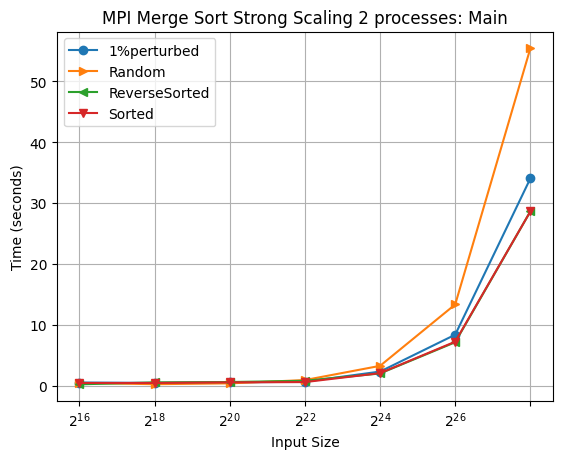

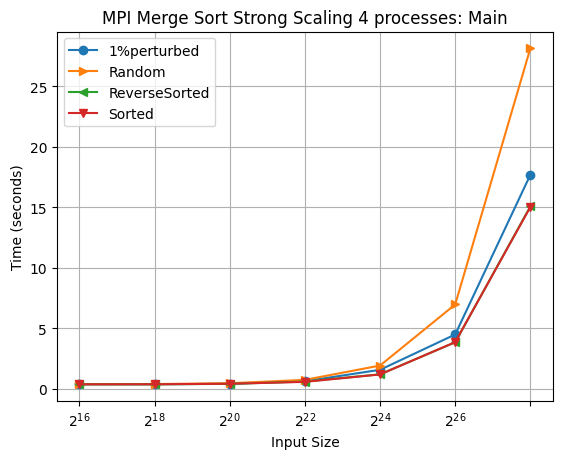

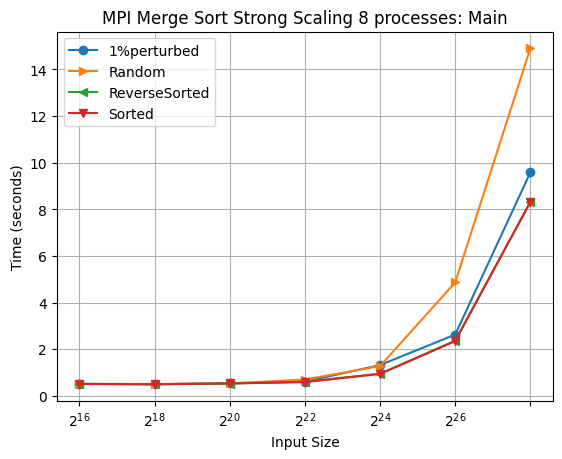

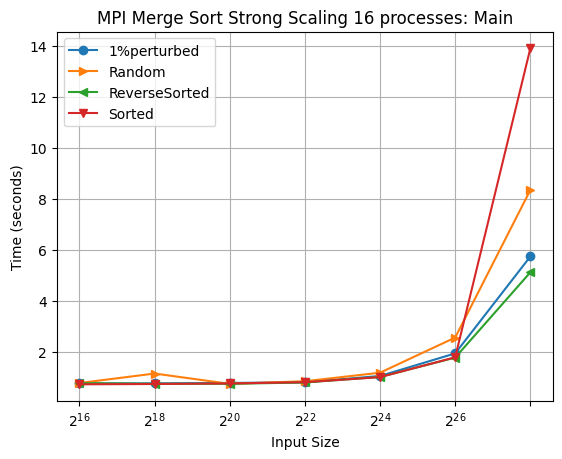

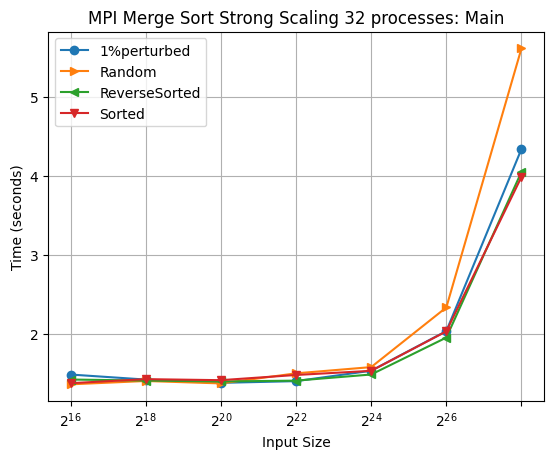

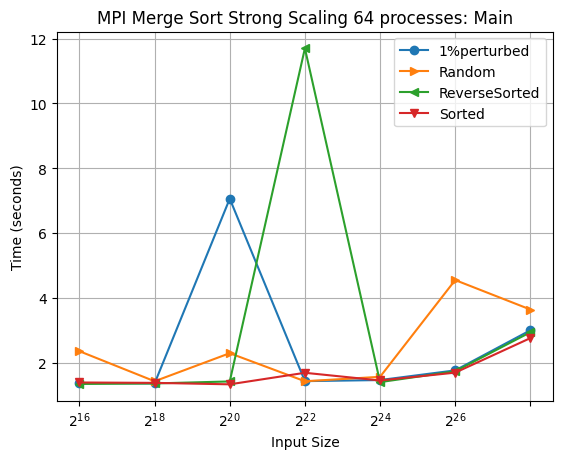

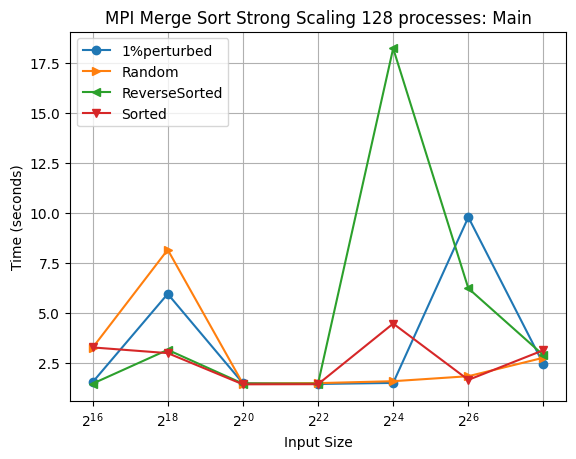

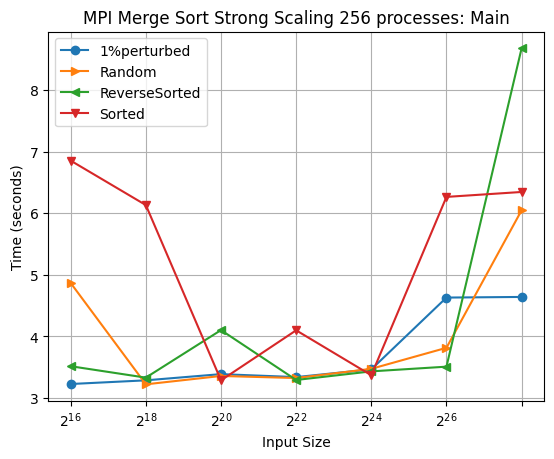

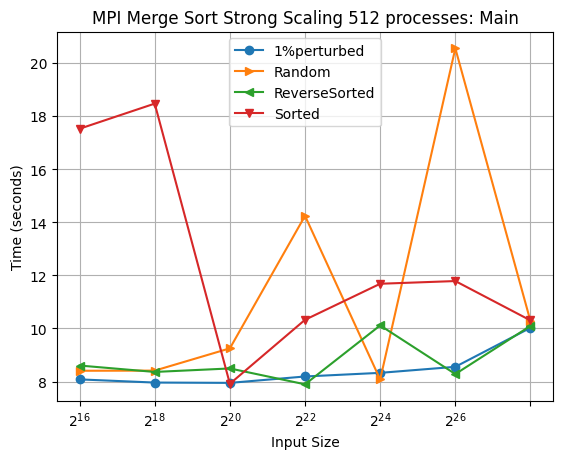

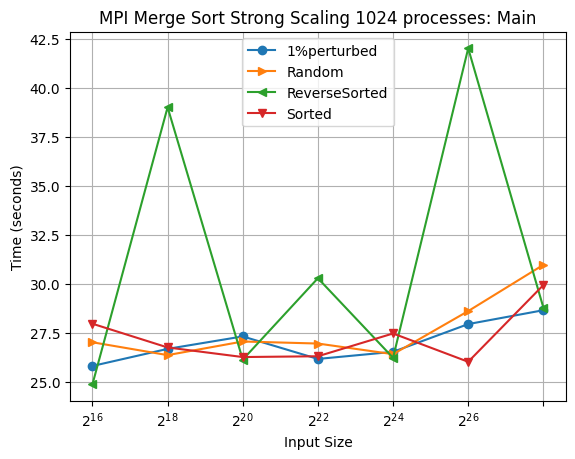

In [29]:
i = 0
for ctk in allctk:
    plot_mpl2(
        df=ctk.dataframe[[temp[0]]].loc["main"],
        df1= ctk.dataframe[[temp[1]]].loc["main"],
        df2= ctk.dataframe[[temp[2]]].loc["main"],
        df3= ctk.dataframe[[temp[3]]].loc["main"],
        title=f"MPI Merge Sort Strong Scaling {threads[i]} processes: Main",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        label1=temp[0][0],
        label2=temp[1][0],
        label3=temp[2][0],
        label4=temp[3][0]
    )
    i += 1

## comp_large Graphs

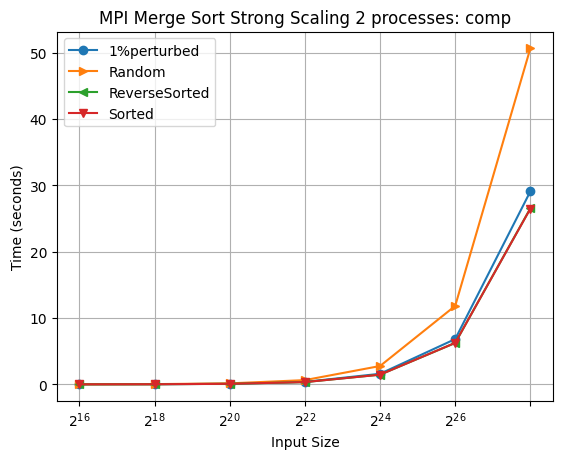

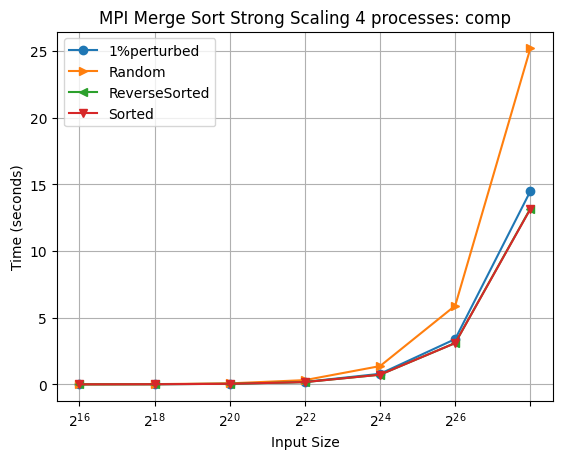

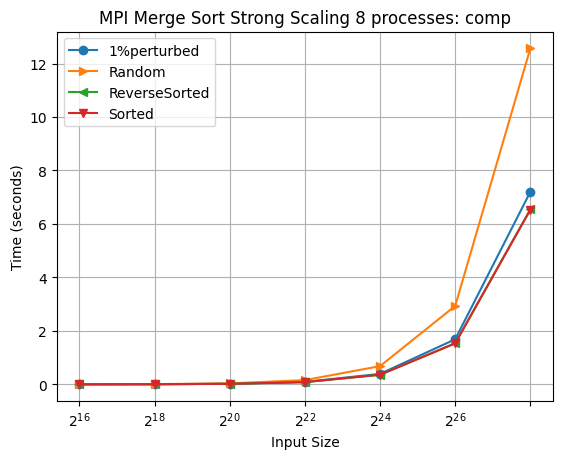

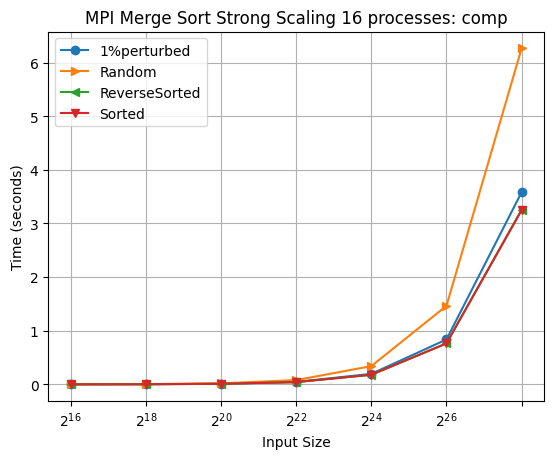

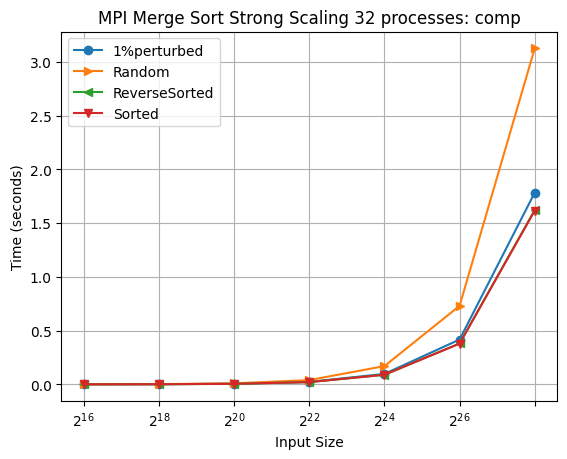

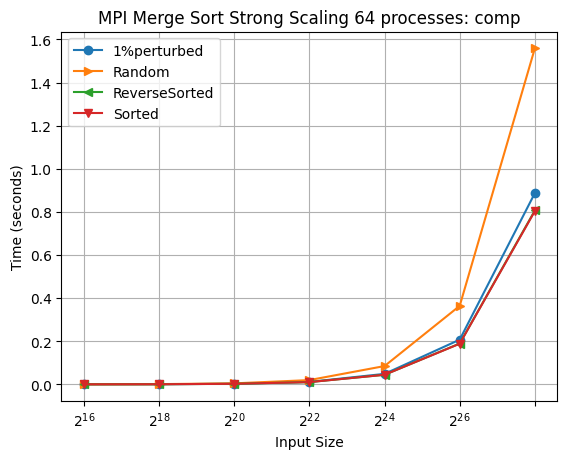

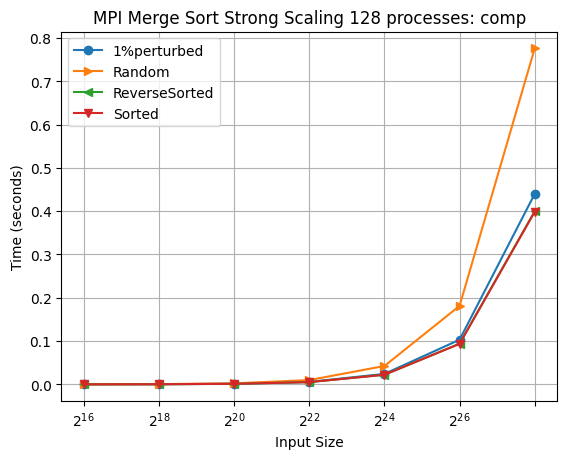

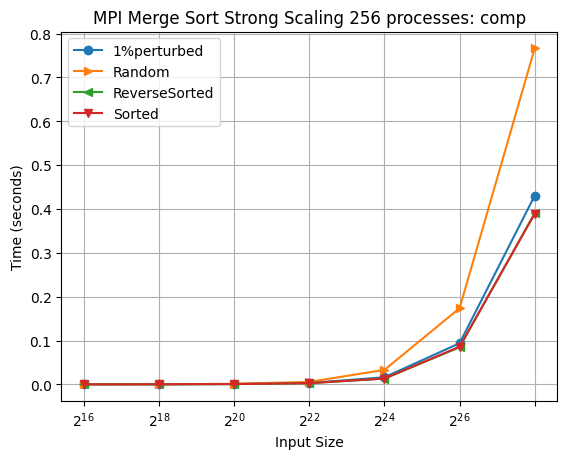

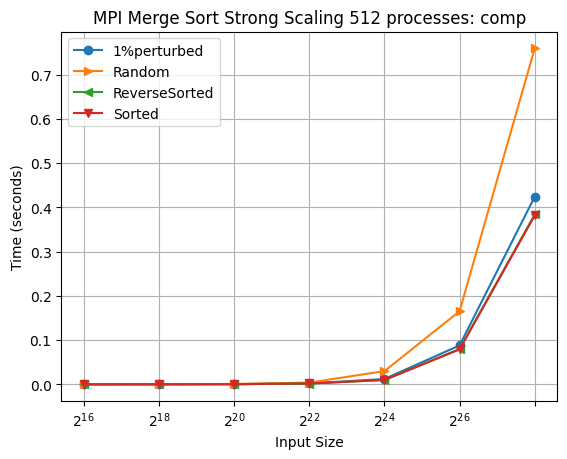

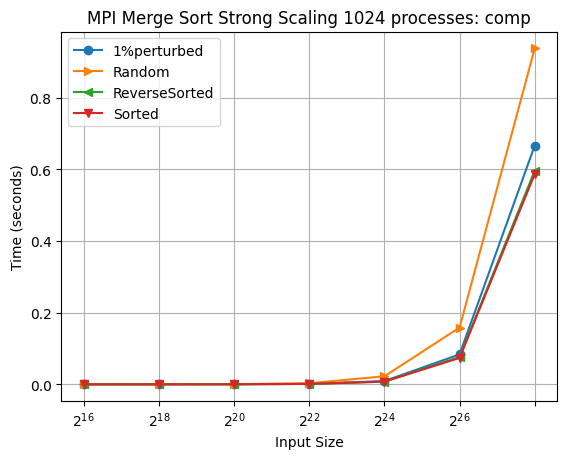

In [32]:
i = 0
for ctk in allctk:
    plot_mpl2(
        df=ctk.dataframe[[temp[0]]].loc["comp"],
        df1= ctk.dataframe[[temp[1]]].loc["comp"],
        df2= ctk.dataframe[[temp[2]]].loc["comp"],
        df3= ctk.dataframe[[temp[3]]].loc["comp"],
        title=f"MPI Merge Sort Strong Scaling {threads[i]} processes: comp",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        label1=temp[0][0],
        label2=temp[1][0],
        label3=temp[2][0],
        label4=temp[3][0]
    )
    i += 1

## Comm Graphs

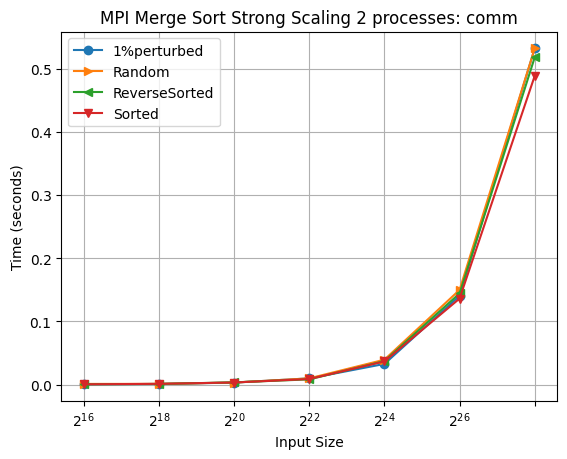

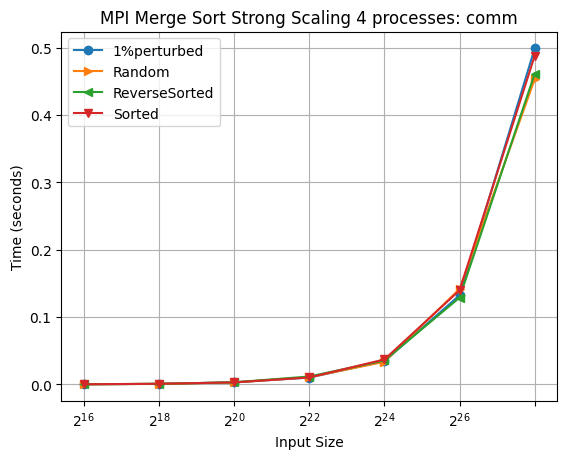

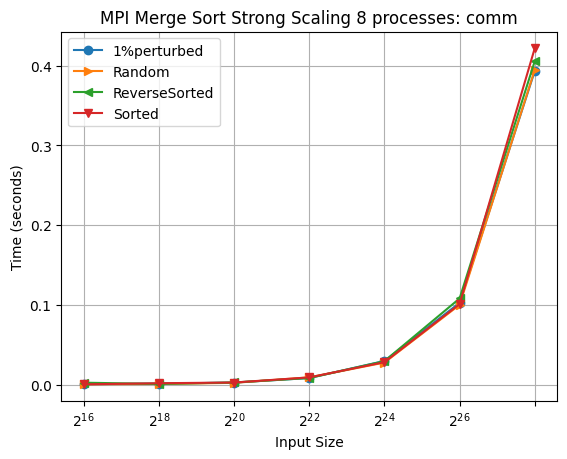

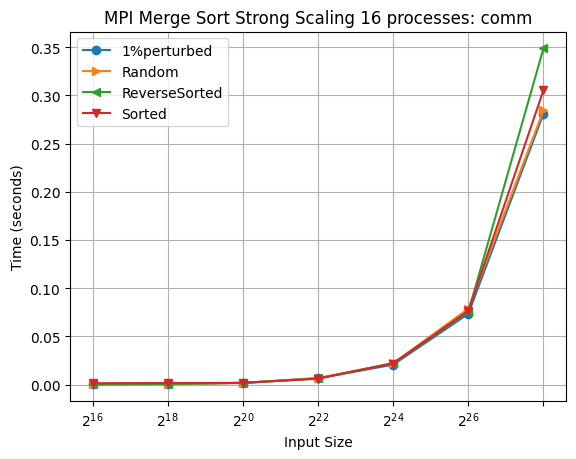

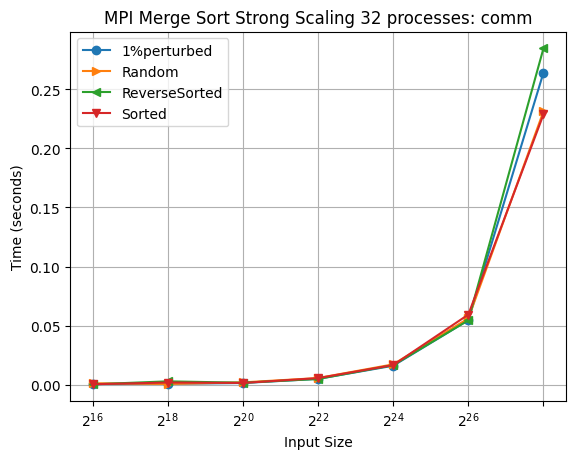

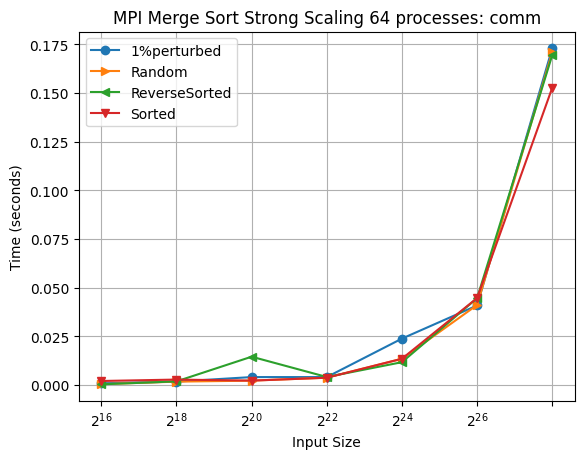

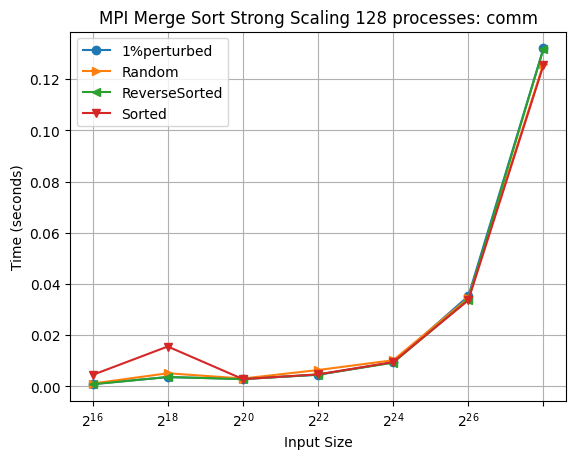

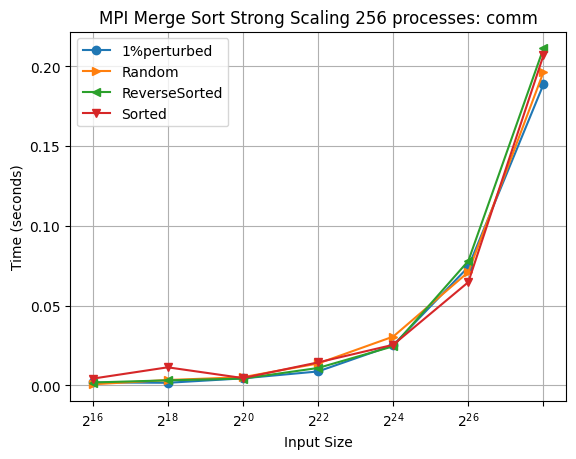

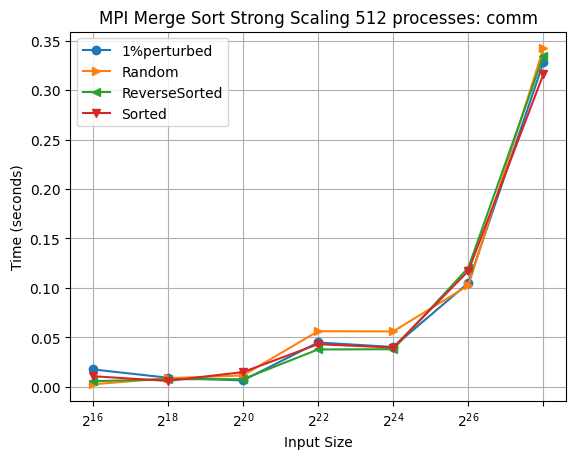

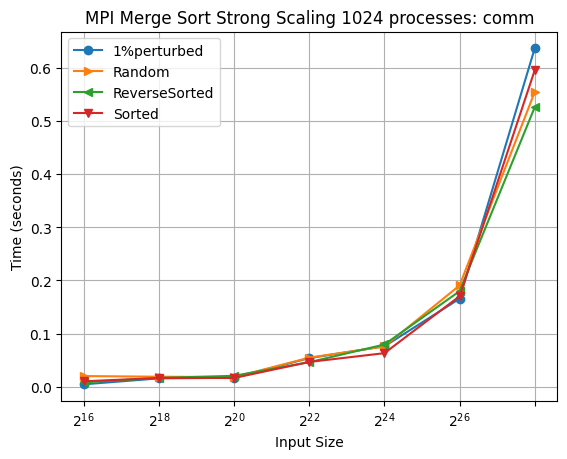

In [33]:
i = 0
for ctk in allctk:
    plot_mpl2(
        df=ctk.dataframe[[temp[0]]].loc["comm"],
        df1= ctk.dataframe[[temp[1]]].loc["comm"],
        df2= ctk.dataframe[[temp[2]]].loc["comm"],
        df3= ctk.dataframe[[temp[3]]].loc["comm"],
        title=f"MPI Merge Sort Strong Scaling {threads[i]} processes: comm",
        xlabel="Input Size",
        ylabel="Time (seconds)",
        label1=temp[0][0],
        label2=temp[1][0],
        label3=temp[2][0],
        label4=temp[3][0]
    )
    i += 1

## TODO: Speedup